In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 header=0, low_memory=False, infer_datetime_format=True, 
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'])


In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.replace('?',np.nan,inplace=True)

In [5]:
values = df.values.astype('float32')
df['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [6]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,71.800003
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,43.099998


In [7]:
df.to_csv('household_power_consumption.csv')

In [8]:
df = pd.read_csv('household_power_consumption.csv', header=0,
                 infer_datetime_format=True, 
                 parse_dates=['datetime'], index_col=['datetime'])
df.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666


In [9]:
(df.isnull().sum()/df.shape[0])*100

Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
sub_metering_4           1.251844
dtype: float64

In [10]:
df.index.dtype

dtype('<M8[ns]')

In [11]:
for i in range(len(df)):
    if pd.isna(df['Global_active_power'].iloc[i]):
        moving = df['Global_active_power'].iloc[i-7:i].mean()
        df['Global_active_power'].iloc[i] = moving

In [12]:
df_n=df[['Global_active_power']]

In [13]:
df_n.isnull().sum()

Global_active_power    0
dtype: int64

In [14]:
daily=df_n.resample('D').sum()
month_avg=daily.resample('M').mean()

In [15]:
daily.iloc[1352:]

,Global_active_power
datetime,
2010-08-29,1668.480
2010-08-30,1494.802
2010-08-31,1365.106
2010-09-01,1593.318
2010-09-02,1392.492
...,...
2010-11-22,2041.536
2010-11-23,1577.536
2010-11-24,1796.248


Text(0, 0.5, 'Daily Power Consumption')

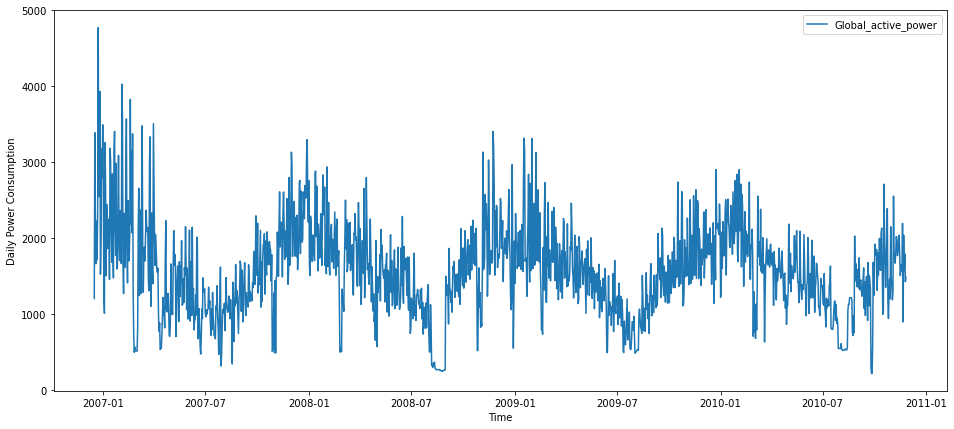

In [16]:
plt.figure(figsize=(16,7))
fig=plt.figure(1)
ax1=fig.add_subplot(111)
sns.lineplot(data=daily)
ax1.set_xlabel('Time')
ax1.set_ylabel('Daily Power Consumption')

## Checking for trend and seasonality in the daily data

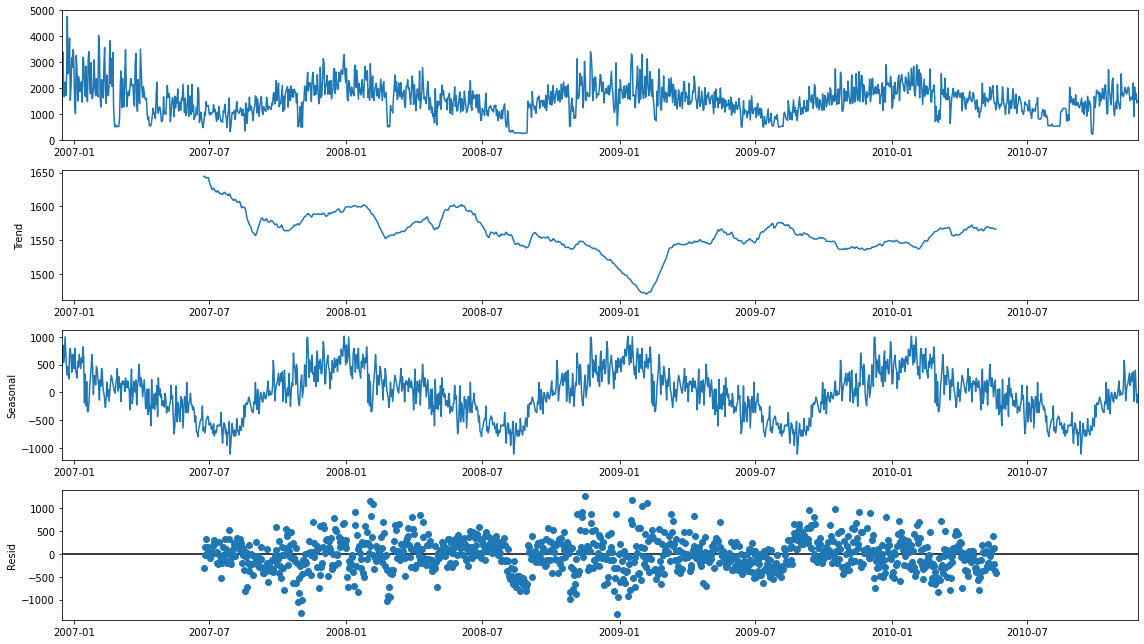

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
result= seasonal_decompose(daily, model='additve',period=380)
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [18]:
train=daily.iloc[:1352]
test=daily.iloc[1352:]# take last 3 months data

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
hsw_model=ExponentialSmoothing(train, trend="mul",seasonal='add',seasonal_periods=380).fit()

In [21]:
test_pred=hsw_model.forecast(90)

In [22]:
test_pred

2010-08-29    1229.278586
2010-08-30    1208.451082
2010-08-31     899.026502
2010-09-01     740.738443
2010-09-02     955.953305
                 ...     
2010-11-22    1873.235497
2010-11-23    1763.861586
2010-11-24    1775.798030
2010-11-25    1331.838250
2010-11-26    1337.353873
Freq: D, Length: 90, dtype: float64

In [23]:
test

,Global_active_power
datetime,
2010-08-29,1668.480
2010-08-30,1494.802
2010-08-31,1365.106
2010-09-01,1593.318
2010-09-02,1392.492
...,...
2010-11-22,2041.536
2010-11-23,1577.536
2010-11-24,1796.248


<AxesSubplot:xlabel='datetime'>

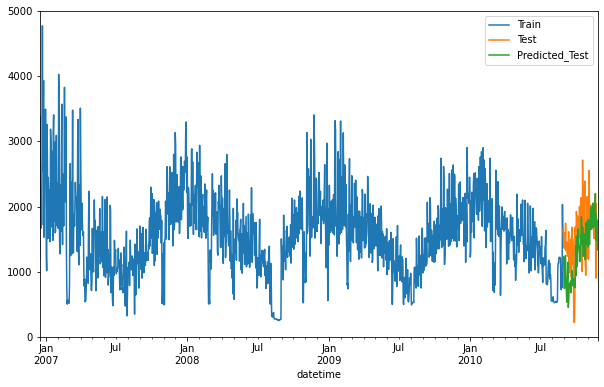

In [24]:
train["Global_active_power"].plot(legend=True,label="Train",figsize=(10,6))
test["Global_active_power"].plot(legend=True,label="Test",figsize=(10,6))
test_pred.plot(legend=True, label="Predicted_Test")


## Model Evaluation

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
import math
print('Mean Absolute Error = ',mean_absolute_error(test,test_pred))
print('Root Mean Squared Error = ',math.sqrt(mean_squared_error(test, test_pred)))

Mean Absolute Error =  407.60279904219806
Root Mean Squared Error =  484.52941003160566


In [27]:
daily['Global_active_power'].mean(), np.sqrt(daily['Global_active_power'].var())
# Here the resultant error has come with 1 standard devistion of the daily consumption so is is the good model

(1562.885444529572, 603.9450281720199)

## Checking for stationarity of the series

In [28]:
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})


In [29]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(daily['Global_active_power'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.7551383006094405
2. P-Value :  0.0034011429252115383
3. Num Of Lags :  22
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1419
5. Critical Values :
	 1% :  -3.434966750462565
	 5% :  -2.8635789736973725
	 10% :  -2.5678555388041384


In [30]:
# KPSS Test
from statsmodels.tsa.stattools import kpss

In [31]:
def kpss_test(timeseries):
    print('Result of KPSS Test result')
    kpsstest=kpss(timeseries,regression='c',nlags='auto')
    kpss_output= pd.Series(kpsstest[0:3],index=['Test Statistic','P Value','Lags Used'])
    for k, v in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%k]=v
    print(kpss_output)

In [32]:
kpss_test(daily['Global_active_power'])

Result of KPSS Test result
Test Statistic            0.212901
P Value                   0.100000
Lags Used                23.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


## Applying ARIMA Model

In [33]:
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

## AR Model

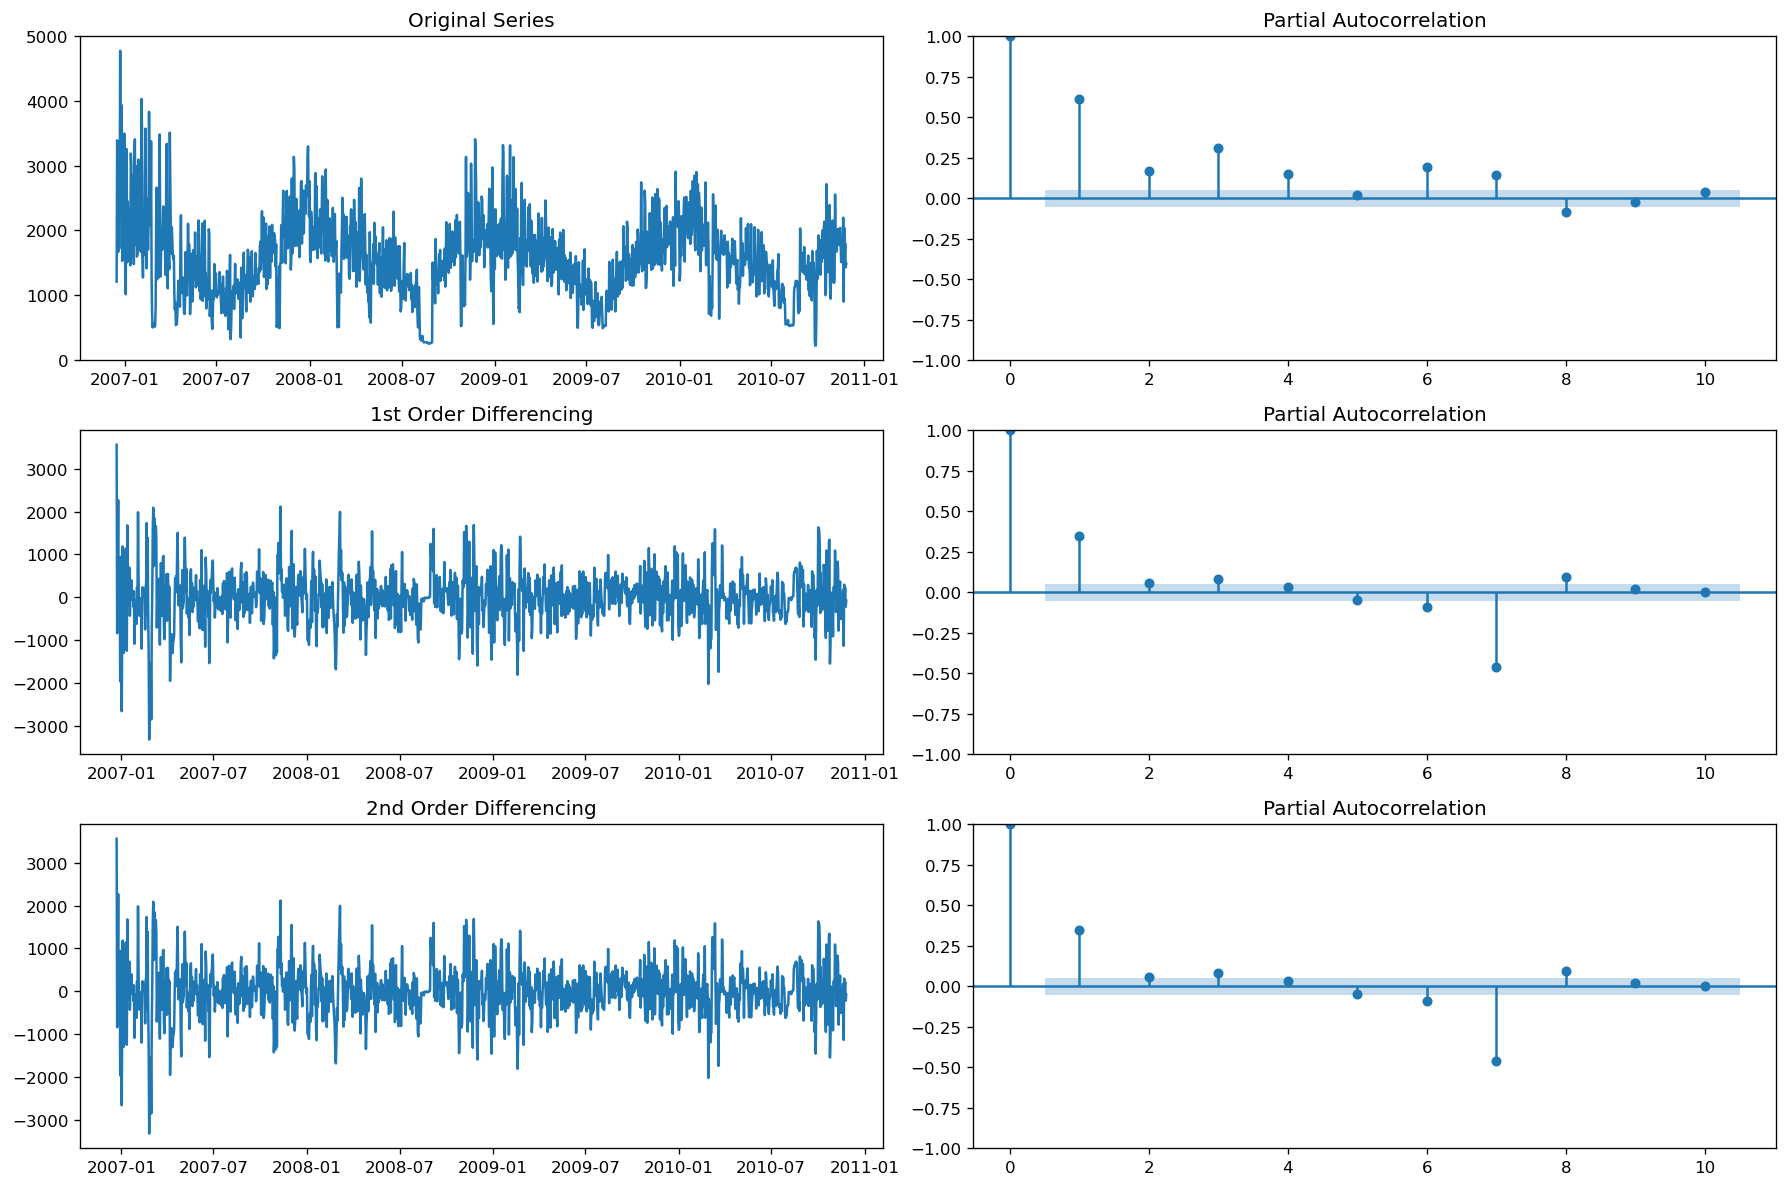

In [34]:
# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(daily); axes[0, 0].set_title('Original Series')
plot_pacf(daily,lags=10, method="ols", ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(daily.diff(periods=7)); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(daily.diff(periods=7).dropna(),lags=10, method="ols" ,ax=axes[1, 1])
# 2nd Differencing
axes[2, 0].plot(daily.diff(periods=7)); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(daily.diff(periods=7).dropna(),lags=10, method="ols", ax=axes[2, 1])
fig.tight_layout()
plt.show()

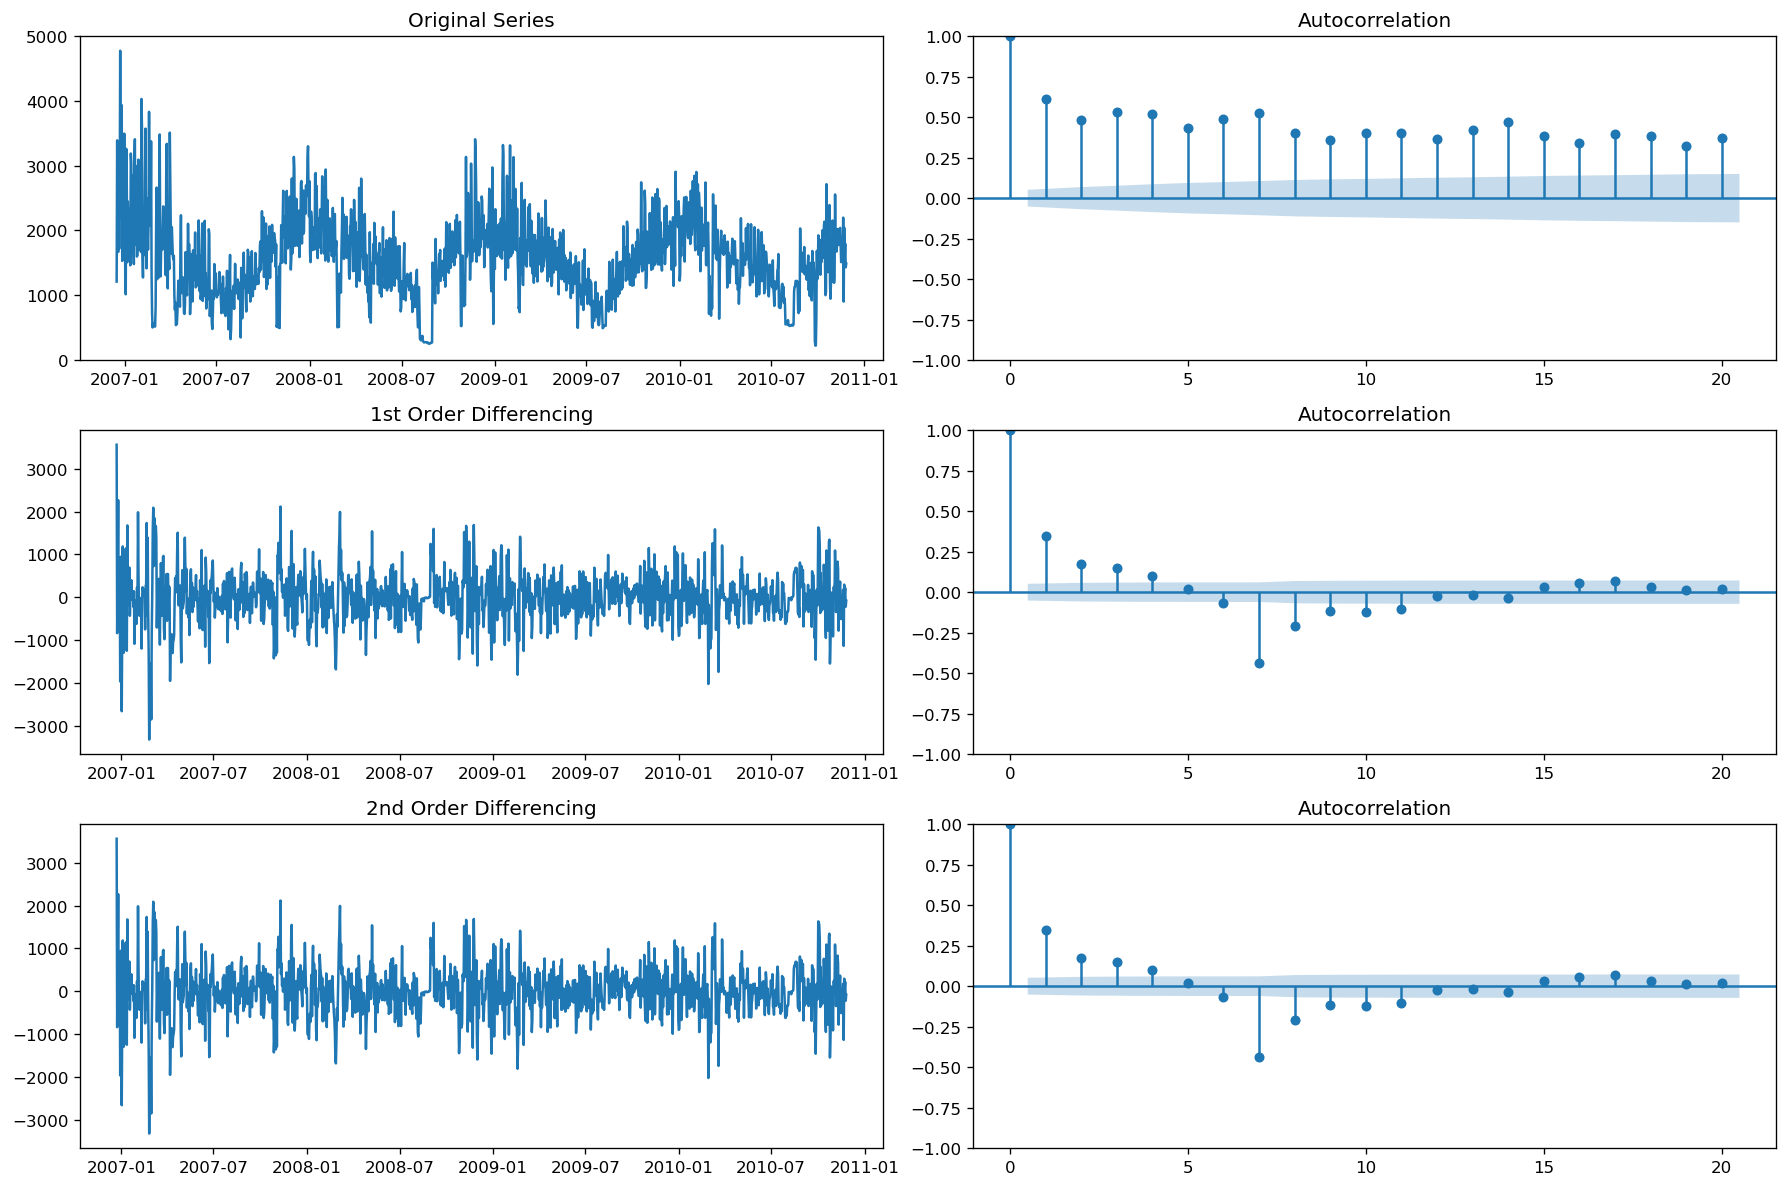

In [35]:
# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(daily); axes[0, 0].set_title('Original Series')
plot_acf(daily,lags=20, ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(daily.diff(periods=7)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(daily.diff(periods=7).dropna(),lags=20, ax=axes[1, 1])
# 2nd Differencing
axes[2, 0].plot(daily.diff(periods=7)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(daily.diff(periods=7).dropna(),lags=20, ax=axes[2, 1])
fig.tight_layout()
plt.show()

In [36]:
#(p,d,q)=(1,0,1)
from statsmodels.tsa.arima.model import ARIMA

In [37]:
model=ARIMA(train['Global_active_power'],order=(1,0,3))
model_fit=model.fit()

In [38]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Global_active_power   No. Observations:                 1352
Model:                  ARIMA(1, 0, 3)   Log Likelihood              -10147.849
Date:                 Thu, 19 Jan 2023   AIC                          20307.698
Time:                         09:47:13   BIC                          20338.954
Sample:                     12-16-2006   HQIC                         20319.403
                          - 08-28-2010                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1564.7209    128.005     12.224      0.000    1313.835    1815.607
ar.L1          0.9775      0.007    132.868      0.000       0.963       0.992
ma.L1         -0.6060      0.021    -28.361      0.000      -0.648      -0.564
ma.L2         -0.2582      0.025    -10.377      0.000      -0.307      -0.209
ma.L3          0.0866      0.021      4.058      0.000       0.045       0.128
sigma2      1.887e+05   5316.411     35.500      0.000    1.78e+05    1.99e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               441.83
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [70]:
data=pd.DataFrame(daily['Global_active_power'],index=daily.index)

## Predicting the (p.d.q) values using auto ARIMA

In [40]:
from pmdarima.arima import auto_arima

In [54]:
model = auto_arima(train,seasonal=True, trace=True, error_action='ignore', suppress_warnings=True, m=7)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=20164.782, Time=4.86 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=20816.381, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=20577.595, Time=1.04 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=20340.527, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=20814.382, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=20280.113, Time=2.42 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=20272.459, Time=2.51 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=20173.348, Time=7.92 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=20173.006, Time=7.74 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=20304.040, Time=1.26 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=20268.618, Time=6.44 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=20252.476, Time=6.50 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=20174.249, Time=8.63 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=20162.192, Time=4.13 sec
 ARIMA(1,1,2)(0,0,1

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

## SARIMA Model

In [42]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [55]:
best_model = SARIMAX(train, order=(1, 1, 3), seasonal_order=(1, 0, 1, 7)).fit(dis=-1)
print(best_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                 Global_active_power   No. Observations:                 1352
Model:             SARIMAX(1, 1, 3)x(1, 0, [1], 7)   Log Likelihood              -10067.378
Date:                             Thu, 19 Jan 2023   AIC                          20148.756
Time:                                     10:43:23   BIC                          20185.216
Sample:                                 12-16-2006   HQIC                         20162.410
                                      - 08-28-2010                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9185      0.032     28.566      0.000       0.855       0.981
ma.L1         -1.5363      

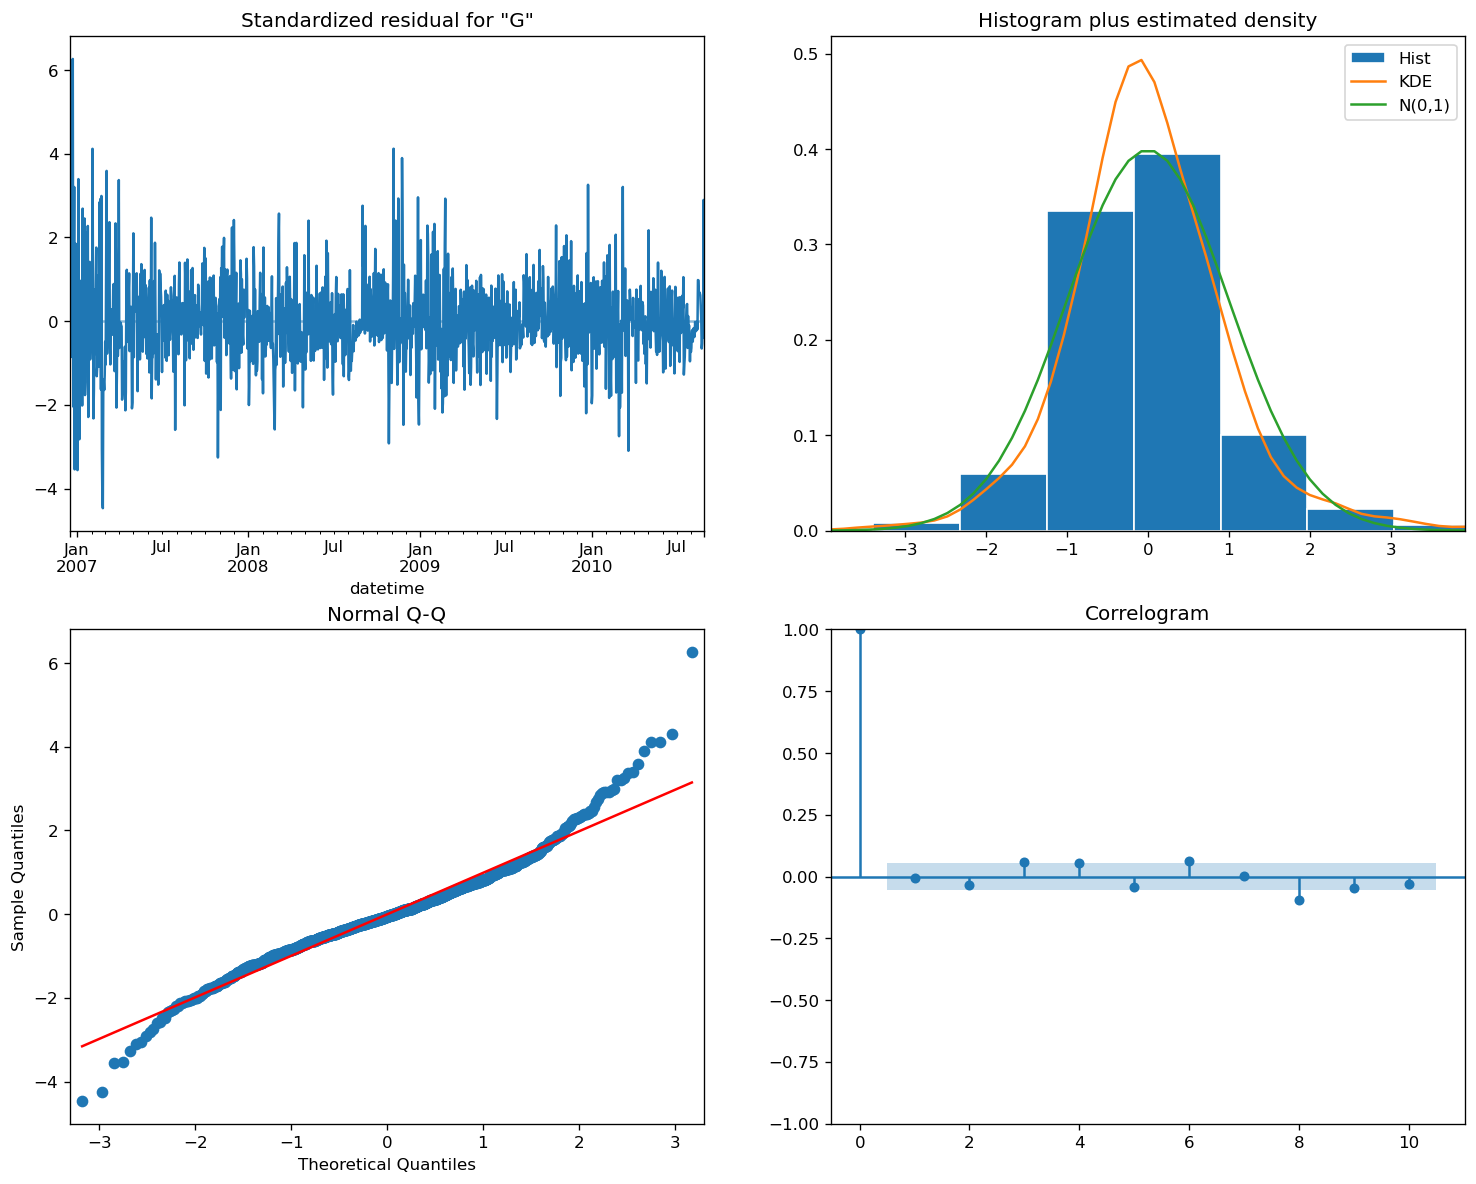

In [56]:
best_model.plot_diagnostics(figsize=(15,12));

In [72]:
data['Predict']=best_model.predict()

In [73]:
data['Predict']

datetime
2006-12-16       0.000000
2006-12-17    1109.615259
2006-12-18    2475.454373
2006-12-19    2076.059467
2006-12-20    1910.532557
                 ...     
2010-11-22            NaN
2010-11-23            NaN
2010-11-24            NaN
2010-11-25            NaN
2010-11-26            NaN
Freq: D, Name: Predict, Length: 1442, dtype: float64

<AxesSubplot:xlabel='datetime'>

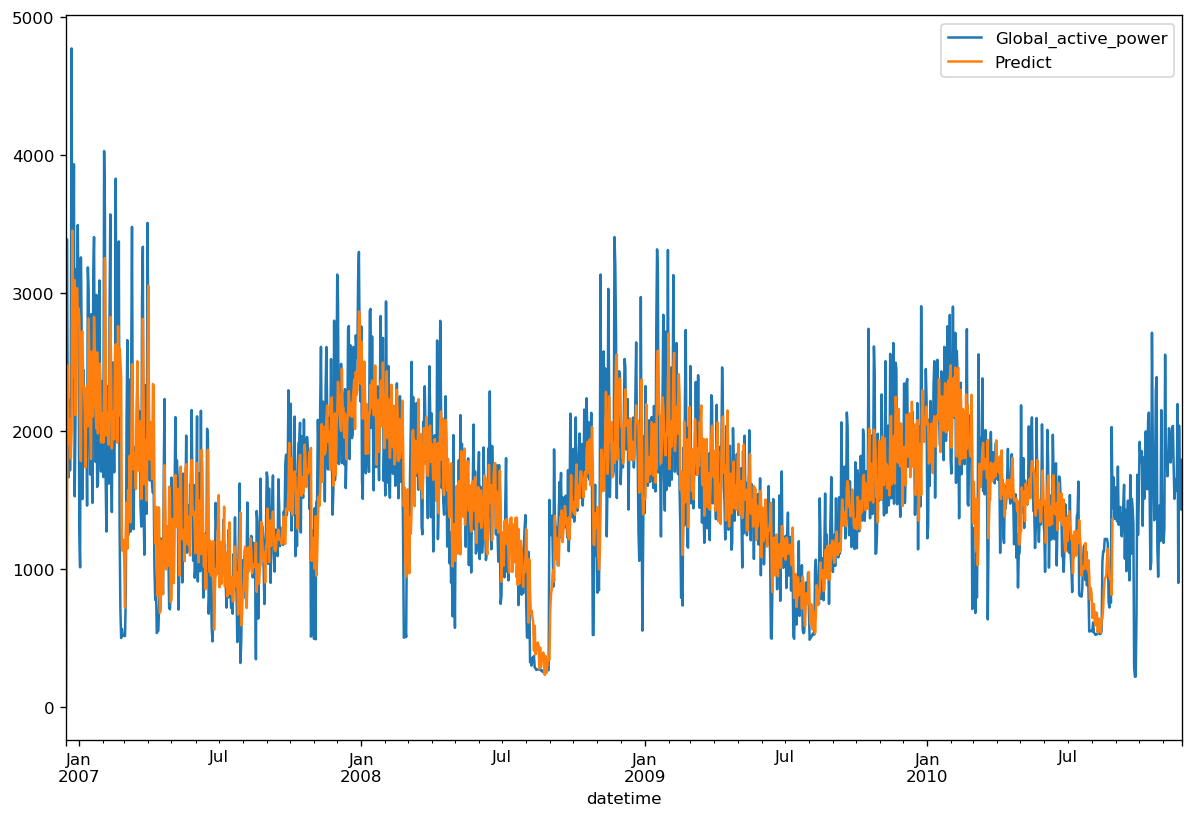

In [74]:
data[['Global_active_power','Predict']].plot(figsize=(12,8))

In [84]:
test_pred=pd.DataFrame(test,index=test.index)
test_pred['Forecast']=best_model.forecast(90)

<AxesSubplot:xlabel='datetime'>

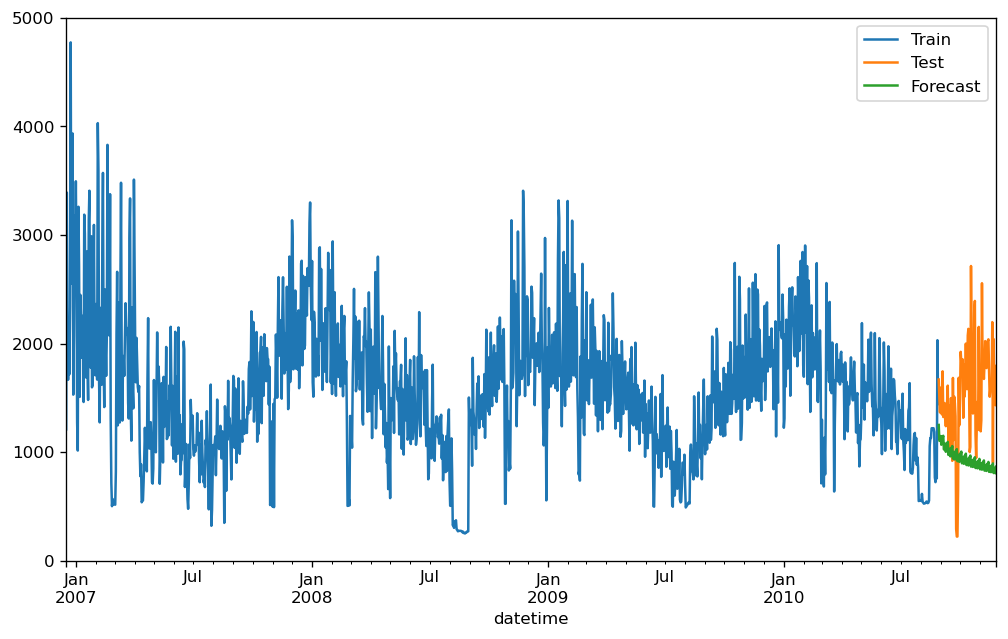

In [98]:
train["Global_active_power"].plot(legend=True,label="Train",figsize=(10,6))
test["Global_active_power"].plot(legend=True,label="Test",figsize=(10,6))
test_pred['Forecast'].plot(legend=True, label="Forecast")

### Model Evaluation using SARIMA

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [92]:
import math
print('Mean Absolute Error = ',mean_absolute_error(test_pred['Forecast'], test_pred['Global_active_power']))
print('Root Mean Squared Error = ',math.sqrt(mean_squared_error(test_pred['Forecast'], test_pred['Global_active_power'])))

Mean Absolute Error =  649.3309507704855
Root Mean Squared Error =  754.0653548825687
